## Exploring <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data"><font color='#28b9fa'>Ames Housing - Neighborhood Dataset</font></a>

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [4]:
ames = pd.read_csv('ames_housing.txt', sep='\t')
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
print(ames.columns.values)

['Order' 'PID' 'MS SubClass' 'MS Zoning' 'Lot Frontage' 'Lot Area'
 'Street' 'Alley' 'Lot Shape' 'Land Contour' 'Utilities' 'Lot Config'
 'Land Slope' 'Neighborhood' 'Condition 1' 'Condition 2' 'Bldg Type'
 'House Style' 'Overall Qual' 'Overall Cond' 'Year Built' 'Year Remod/Add'
 'Roof Style' 'Roof Matl' 'Exterior 1st' 'Exterior 2nd' 'Mas Vnr Type'
 'Mas Vnr Area' 'Exter Qual' 'Exter Cond' 'Foundation' 'Bsmt Qual'
 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin SF 1'
 'BsmtFin Type 2' 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF' 'Heating'
 'Heating QC' 'Central Air' 'Electrical' '1st Flr SF' '2nd Flr SF'
 'Low Qual Fin SF' 'Gr Liv Area' 'Bsmt Full Bath' 'Bsmt Half Bath'
 'Full Bath' 'Half Bath' 'Bedroom AbvGr' 'Kitchen AbvGr' 'Kitchen Qual'
 'TotRms AbvGrd' 'Functional' 'Fireplaces' 'Fireplace Qu' 'Garage Type'
 'Garage Yr Blt' 'Garage Finish' 'Garage Cars' 'Garage Area' 'Garage Qual'
 'Garage Cond' 'Paved Drive' 'Wood Deck SF' 'Open Porch SF'
 'Enclosed Porch' '3Ssn Porch' 'Sc

<font color='blue'>Creating a new DataFrame for sales price groped by the neighborhood</font>

In [6]:
columns = ames.loc[:,['Neighborhood','SalePrice']]
gp_nbhd = columns.groupby('Neighborhood').mean('SalePrice')
ames_nbhd = pd.DataFrame(gp_nbhd)
ames_nbhd = ames_nbhd.sort_values('SalePrice')
ames_nbhd.head(5)

,SalePrice
Neighborhood,
MeadowV,95756.486486
IDOTRR,103752.903226
BrDale,105608.333333
OldTown,123991.891213
BrkSide,124756.250000


<font color='blue'>Visualization of average sale price by neighborhood</font>

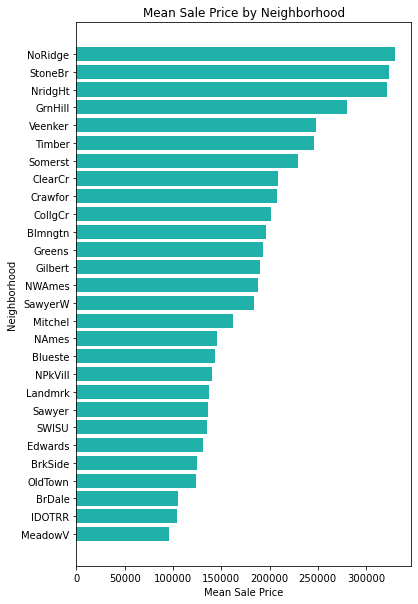

In [7]:
plt.figure(figsize = [6,10])
plt.barh(ames_nbhd.index, ames_nbhd['SalePrice'], color='lightseagreen')
plt.xlabel('Mean Sale Price')
plt.ylabel('Neighborhood')
plt.title('Mean Sale Price by Neighborhood')
plt.show()

<font color='blue'>Creating a new DataFrame for the count of homes grouped by house style</font>

In [8]:
columns = ames.loc[:,['House Style','SalePrice']]
gp_style = columns.groupby('House Style').count()
ames_style = pd.DataFrame(gp_style)
ames_style.rename(columns={'SalePrice':'Count'}, inplace=True)
ames_style = ames_style.sort_values('Count')
ames_style

,Count
House Style,
2.5Fin,8
1.5Unf,19
2.5Unf,24
SFoyer,83
SLvl,128
1.5Fin,314
2Story,873
1Story,1481


<font color='blue'>Visualiztion of count of homes grouped by house style</font>

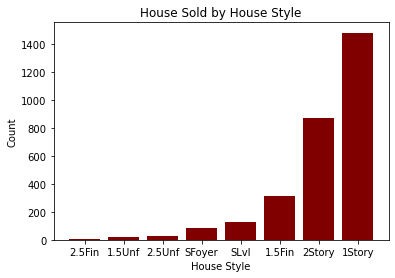

In [9]:
plt.figure(figsize = [6,4])
plt.bar(ames_style.index, ames_style['Count'], color='maroon')
plt.xlabel('House Style')
plt.ylabel('Count')
plt.title('House Sold by House Style')
plt.show()